In [19]:
# Common imports
import numpy as np
import os
import glob
import cv2

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
ID = "BZ_data_analysis"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [141]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    colors = np.array(['red'] * len(blues) + ['blue'] * len(reds)) 
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=colors)
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                pass
            else:
                image = cv2.resize(images[index], (25,25))
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [86]:
blues = [cv2.imread(file) for file in glob.glob("../img_proc/blues/*.png")]  
reds = [cv2.imread(file) for file in glob.glob("../img_proc/reds/*.png")] 

dataset = blues + reds

responses = np.array([0] * len(blues) + [1] * len(reds), dtype=np.int32) 

In [87]:
# only take blue channel from dataset
bc =  [img[:,:,0] for img in dataset]  
# transform it into 25 by 25
b25 =  np.array([cv2.resize(i, (25,25)) for i in bc], dtype=np.float32)
# flatten it into 1D
bdataset = np.array([img.reshape(-1) for img in b25])

In [126]:
rgb25 =  np.array([cv2.resize(i, (25,25)) for i in dataset], dtype=np.float32)
rgbdataset = np.array([img.reshape(-1) for img in rgb25])

In [81]:
dataset.shape

(2429, 625)

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(dataset)

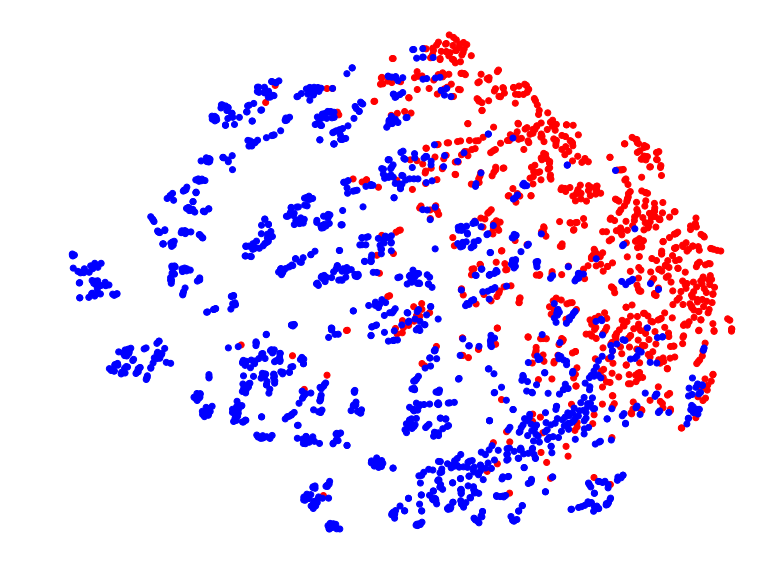

In [138]:
colors = np.array(['red'] * len(blues) + ['blue'] * len(reds)) 

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors)#, color="r")
plt.axis('off')
plt.show()

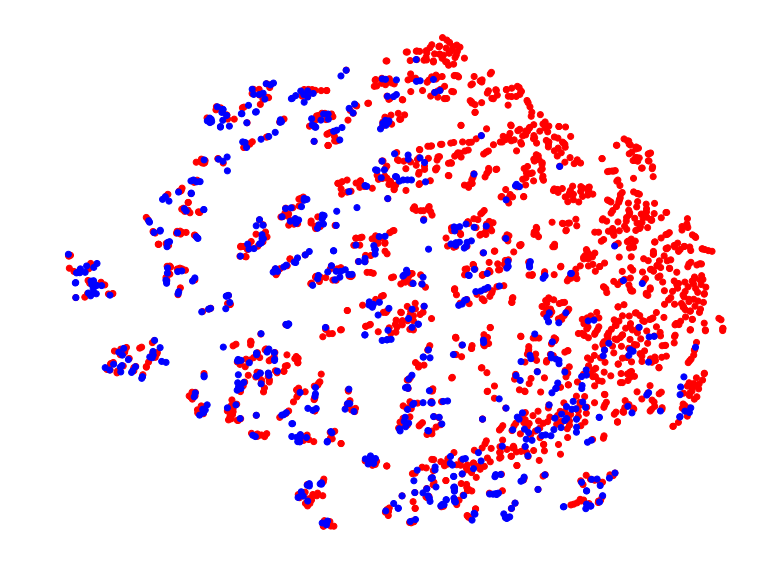

In [142]:
plot_digits(X_reduced, responses)

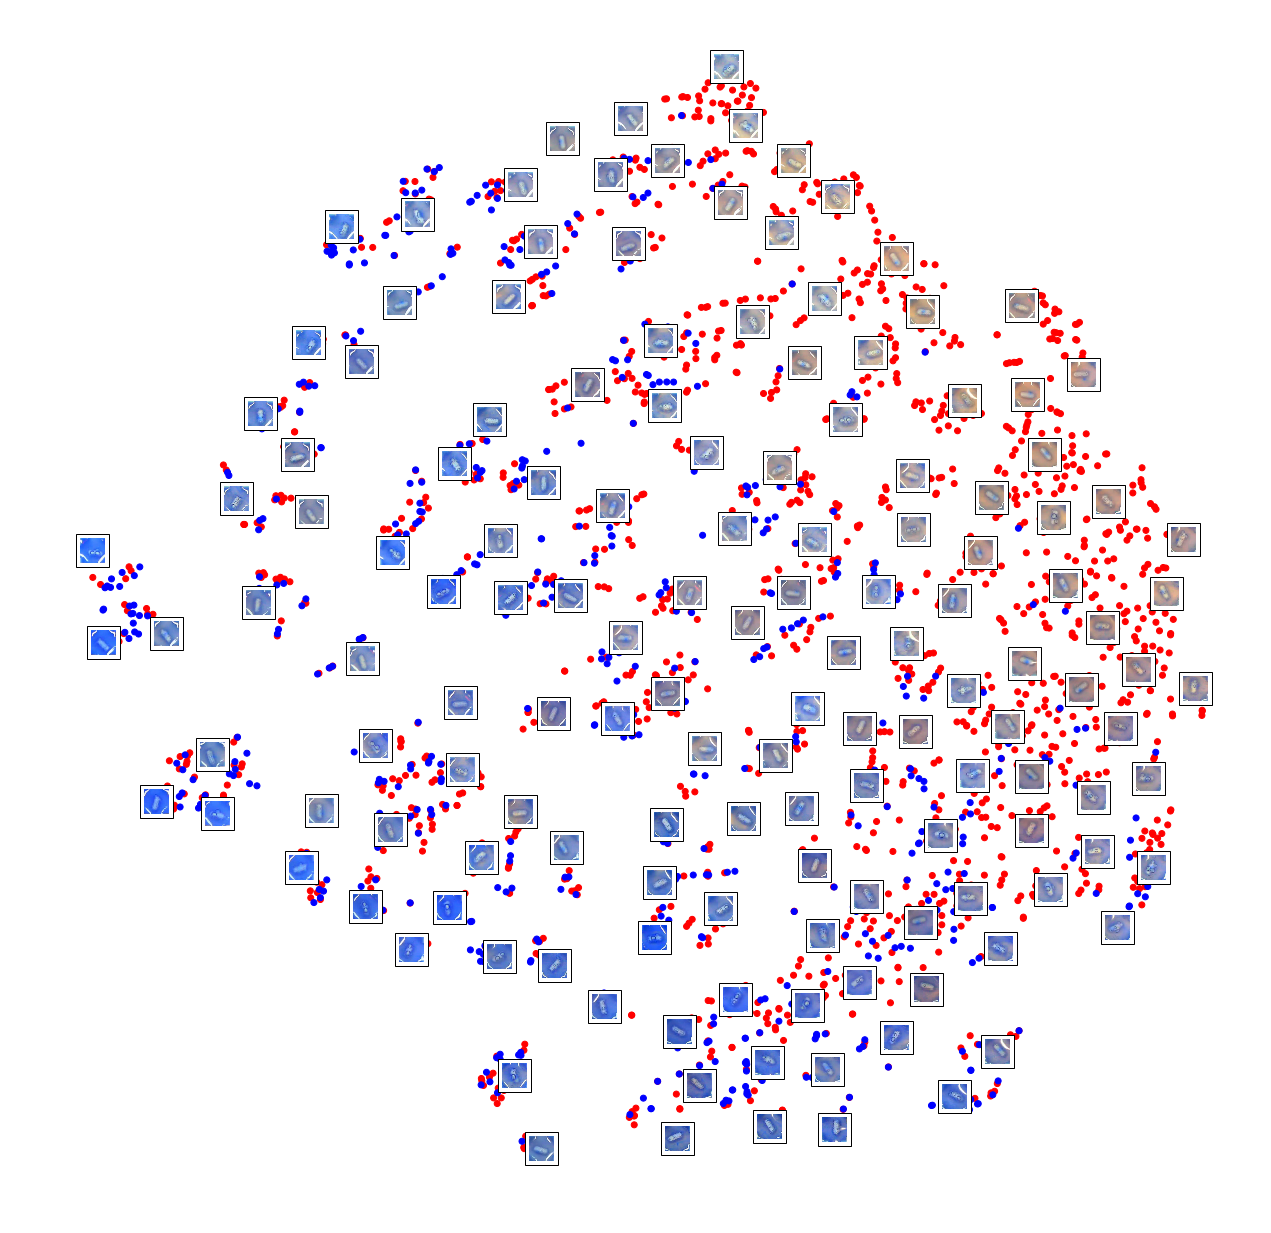

In [144]:
plot_digits(X_reduced, responses, images=dataset, figsize=(22, 22))

In [145]:
resized = [ cv2.resize(img, (15,15) ) for img in dataset]
resized32 = np.array(resized, dtype=np.float32)
# take the red and blue channels
rbc =  [np.concatenate((i[:,:,0], i[:,:,2])) for i in resized32]  
# flatten it into 1D
rbdataset = np.array([img.reshape(-1) for img in rbc])

In [146]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(rbdataset)

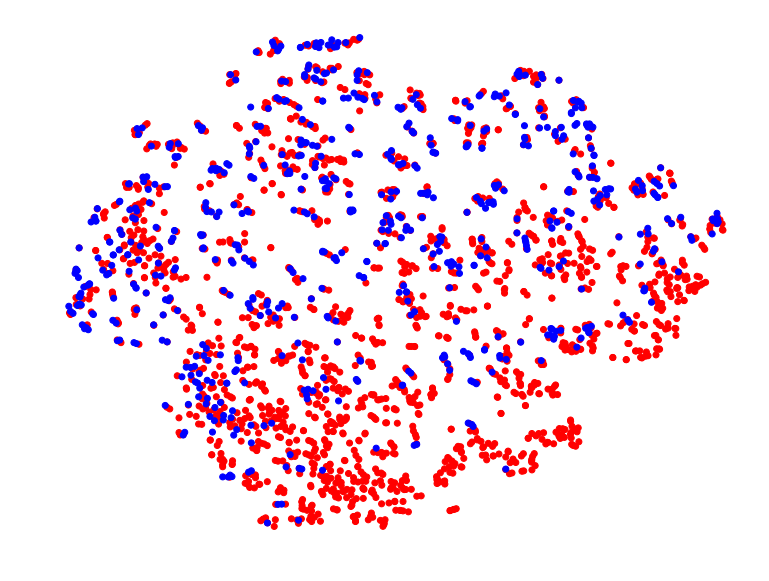

In [147]:
plot_digits(X_reduced, responses)

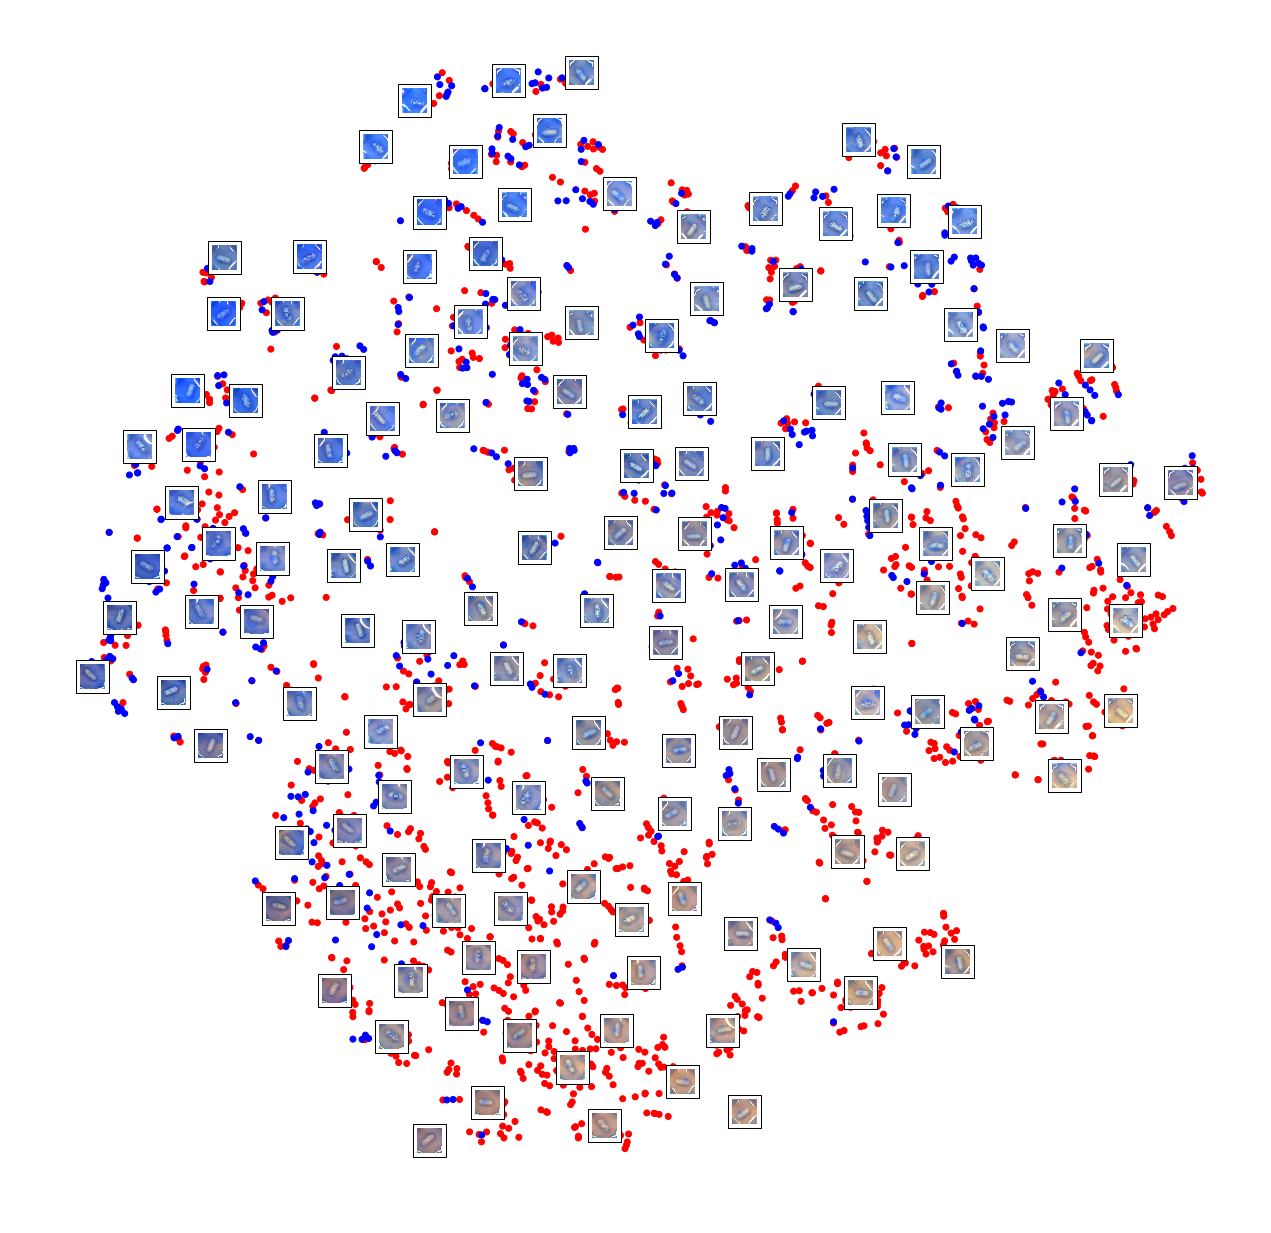

In [148]:
plot_digits(X_reduced, responses, images=dataset, figsize=(22, 22))

In [156]:
from sklearn.decomposition import PCA

resized = [ cv2.resize(img, (50,50) ) for img in dataset]
resized = np.asarray(resized, dtype=np.float32)
# reshape from (N, size, size, 3) to (N, size*size*3)
data2D = resized.reshape( resized.shape[0], -1)

# init the PCA
X_pca_reduced = PCA(n_components=8, random_state=42).fit_transform(data2D)

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_pca_reduced)

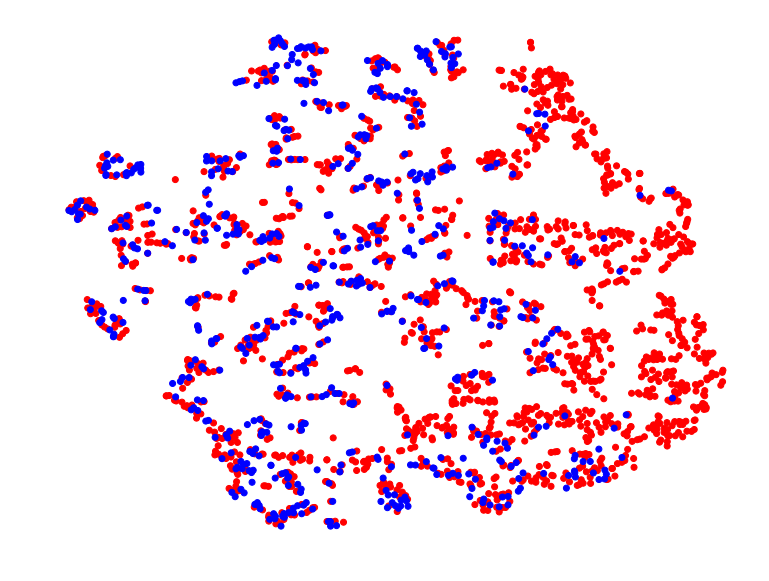

In [157]:
plot_digits(X_reduced, responses)

In [158]:
resized = [ cv2.resize(img, (50,50) ) for img in dataset]
resized = np.asarray(resized, dtype=np.float32)
# reshape from (N, size, size, 3) to (N, size*size*3)
data2D = resized.reshape( resized.shape[0], -1)

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(data2D)

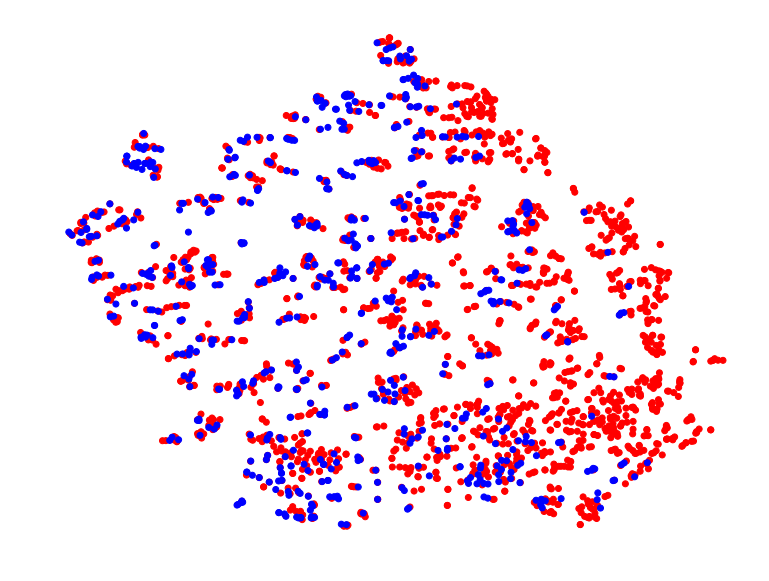

In [159]:
plot_digits(X_reduced, responses)

In [160]:
from sklearn.decomposition import PCA

resized = [ cv2.resize(img, (50,50) ) for img in dataset]
resized = np.asarray(resized, dtype=np.float32)
# reshape from (N, size, size, 3) to (N, size*size*3)
data2D = resized.reshape( resized.shape[0], -1)

# init the PCA
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(data2D)

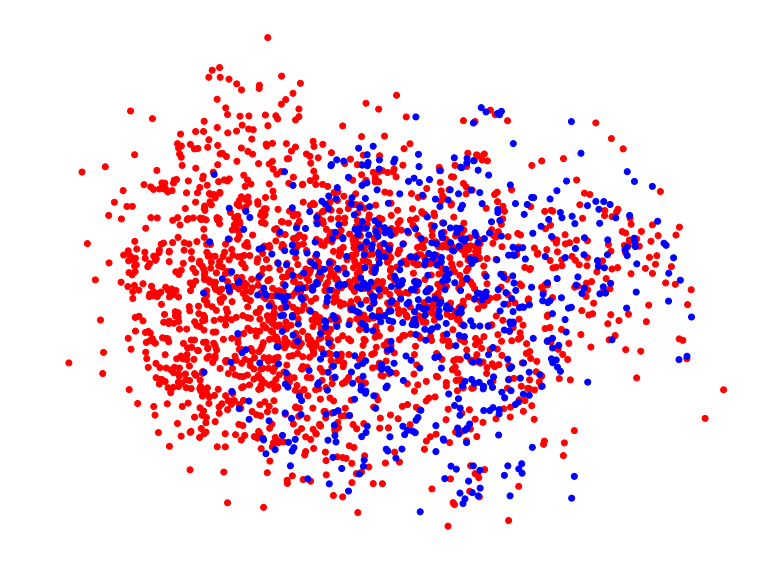

In [161]:
plot_digits(X_pca_reduced, responses)

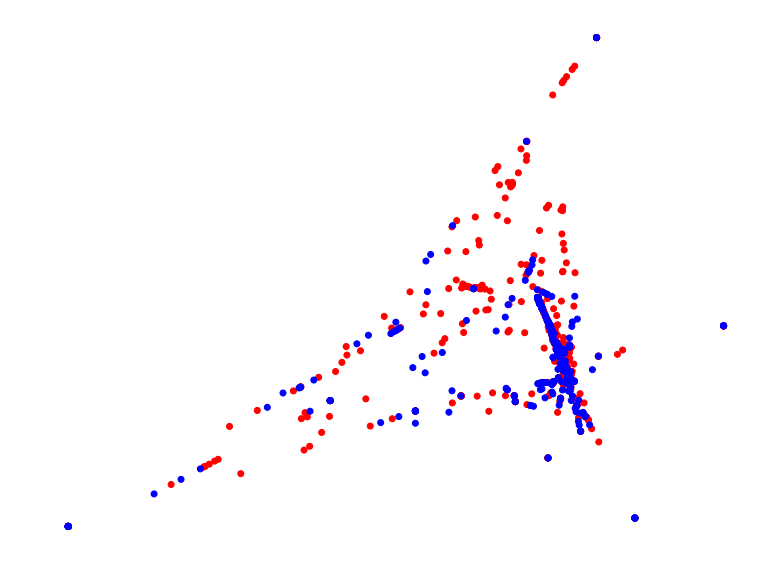

In [170]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
X_pca_lle_reduced = pca_lle.fit_transform(data2D)
plot_digits(X_pca_lle_reduced, responses)